In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/srey/para/1_projects/course_385/24s_385/g358s24/week-14':
  os.chdir(r'/Users/srey/para/1_projects/course_385/24s_385/g358s24/week-14')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/Users/srey/mambaforge/envs/courses_24s/lib/python3.11/importlib/_bootstrap.py": 1703342552.9424675, "/Users/srey/mambaforge/envs/courses_24s/lib/python3.11/importlib/_bootstrap_external.py": 1703342552.9466445, "/Users/srey/mambaforge/envs/courses_24s/lib/python3.11/zipimport.py": 1703342551.0366228, "/Users/srey/mambaforge/envs/courses_24s/lib/python3.11/codecs.py": 1703342550.4617856, "/Users/srey/mambaforge/envs/courses_24s/lib/python3.11/encodings/aliases.py": 1703342551.8345973, "/Users/srey/mambaforge/envs/courses_24s/lib/python3.11/encodings/__init__.py": 1703342551.8315241, "/Users/srey/mambaforge/envs/courses_24s/lib/python3.11/encodings/utf_8.py": 1703342552.361053, "/Users/srey/mambaforge/envs/courses_24s/lib/python3.11/abc.py": 1703342550.3190587, "/Users/srey/mambaforge/envs/courses_24s/lib/python3.11/io.py": 1703342550.6952662, "/Users/srey/mambaforge/envs/courses_24s/lib/python3.11/stat.py": 1703342550.9112048, "/Users/srey/mambaforge/envs/courses_24s/lib/python3.11/_

/var/folders/w4/_fx8nhgx7bb77lbtxzxv31f40000gq/T/ipykernel_74861/4076719872.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


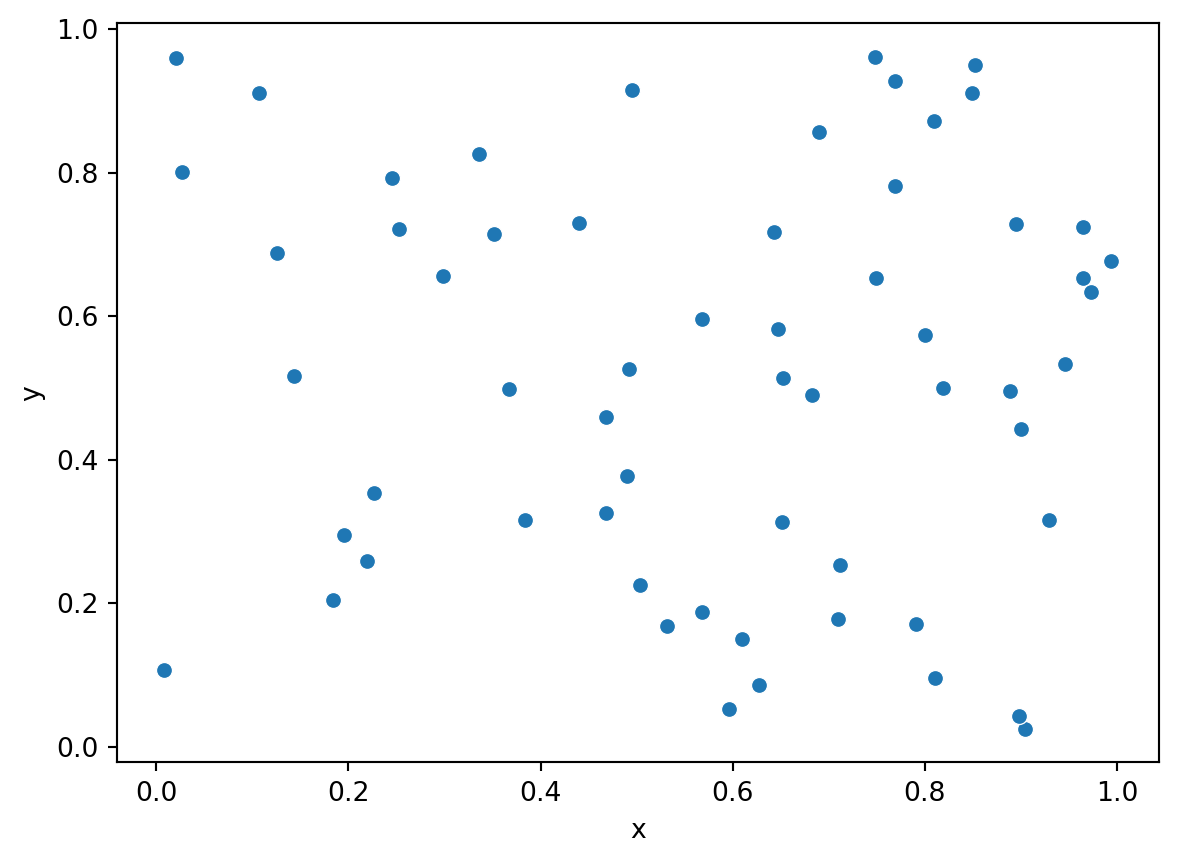

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(12345)
n = 60
xy = np.random.rand(60,2)
df = pd.DataFrame(data=xy, columns=['x', 'y'])
sns.scatterplot(x='x', y='y', data=df);

In [3]:
import pointpats as pp

In [4]:
csr = pp.PointPattern(xy)

In [5]:
csr.summary()

Point Pattern
60 points
Bounding rectangle [(0.00838829794155349,0.024676210429265266), (0.9940145858999619,0.9613067360728214)]
Area of window: 0.9231676681785911
Intensity estimate for window: 64.99361066054225
          x         y
0  0.929616  0.316376
1  0.183919  0.204560
2  0.567725  0.595545
3  0.964515  0.653177
4  0.748907  0.653570


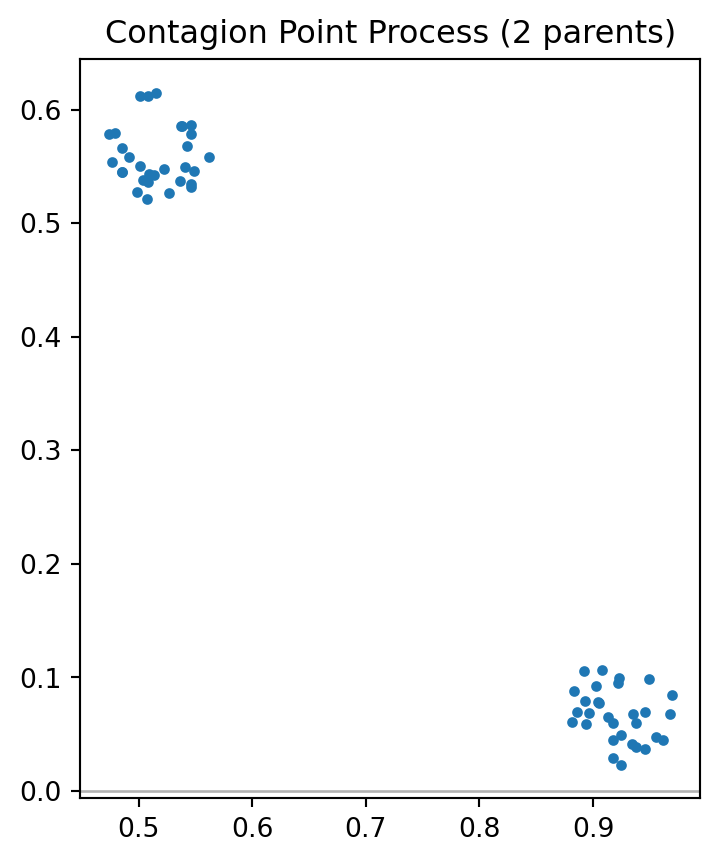

In [6]:
w = pp.Window([(0,0), (0,1), (1,1), (1,0), (0,0)])
draw = pp.PoissonClusterPointProcess(w, n, 2, 0.05, 1, asPP=True, conditioning=False)
draw.realizations[0].plot(window=True, title='Contagion Point Process (2 parents)')

In [7]:
clustered = draw.realizations[0]

In [8]:
clustered.summary()

Point Pattern
60 points
Bounding rectangle [(0.47331760265312733,0.023178703349462502), (0.9696584457277277,0.6150208352748628)]
Area of window: 1.0
Intensity estimate for window: 60.0
          x         y
0  0.513060  0.541971
1  0.473318  0.578385
2  0.508373  0.536200
3  0.881716  0.060328
4  0.894221  0.059273


In [9]:
import pointpats.quadrat_statistics as qs

<Axes: title={'center': 'Quadrat Count'}>

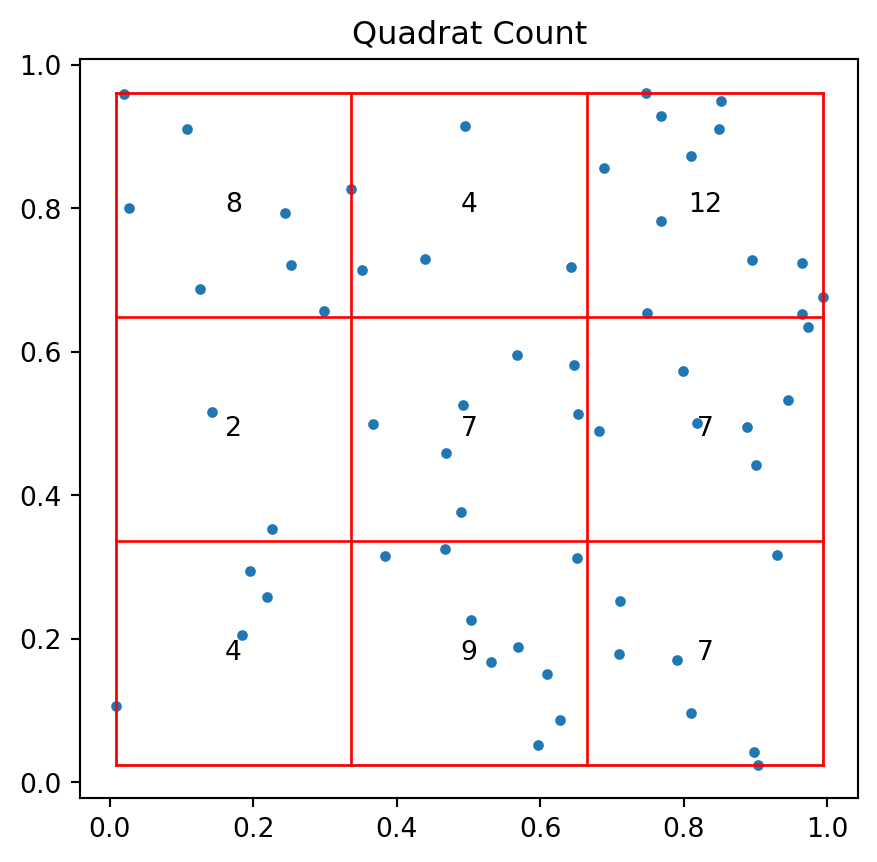

In [10]:
csr_qr = qs.QStatistic(csr, shape='rectangle', nx=3, ny=3)
csr_qr.plot()

In [11]:
csr_qr.chi2

10.8

In [12]:
csr_qr.chi2_pvalue

0.21329101843394052

<Axes: title={'center': 'Quadrat Count'}>

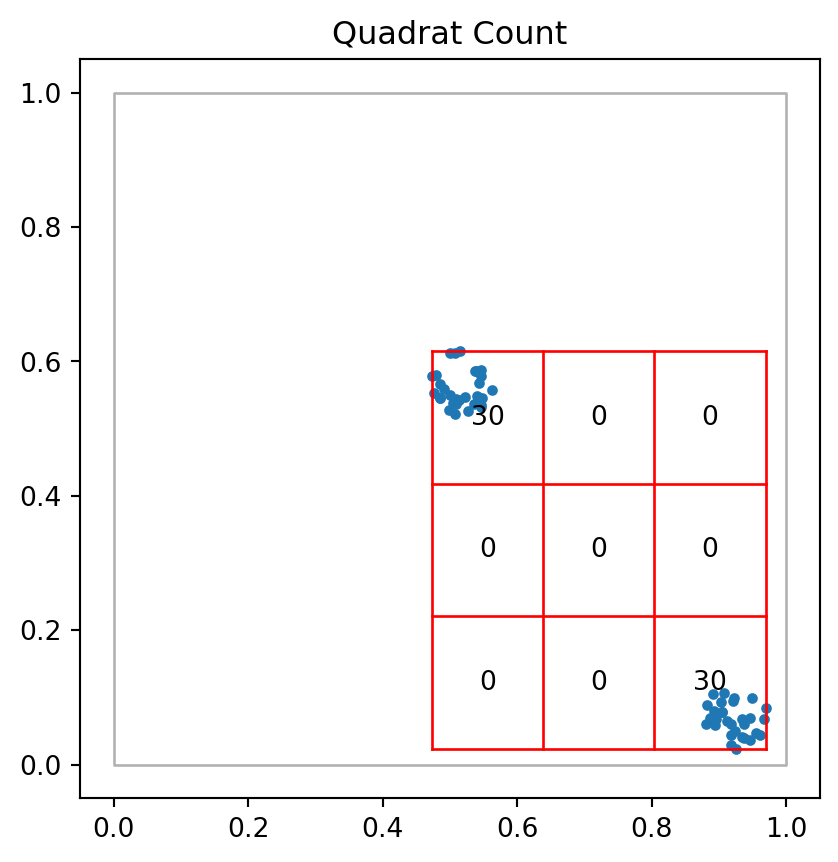

In [13]:
clustered_qr = qs.QStatistic(clustered, shape='rectangle', nx=3, ny=3)
clustered_qr.plot()

In [14]:
clustered_qr.chi2

209.99999999999994

In [15]:
clustered_qr.chi2_pvalue

4.976940117448032e-41

In [16]:
csr_qr_hex = qs.QStatistic(csr, shape='hexagon', lh=0.2)


<Axes: title={'center': 'Quadrat Count'}>

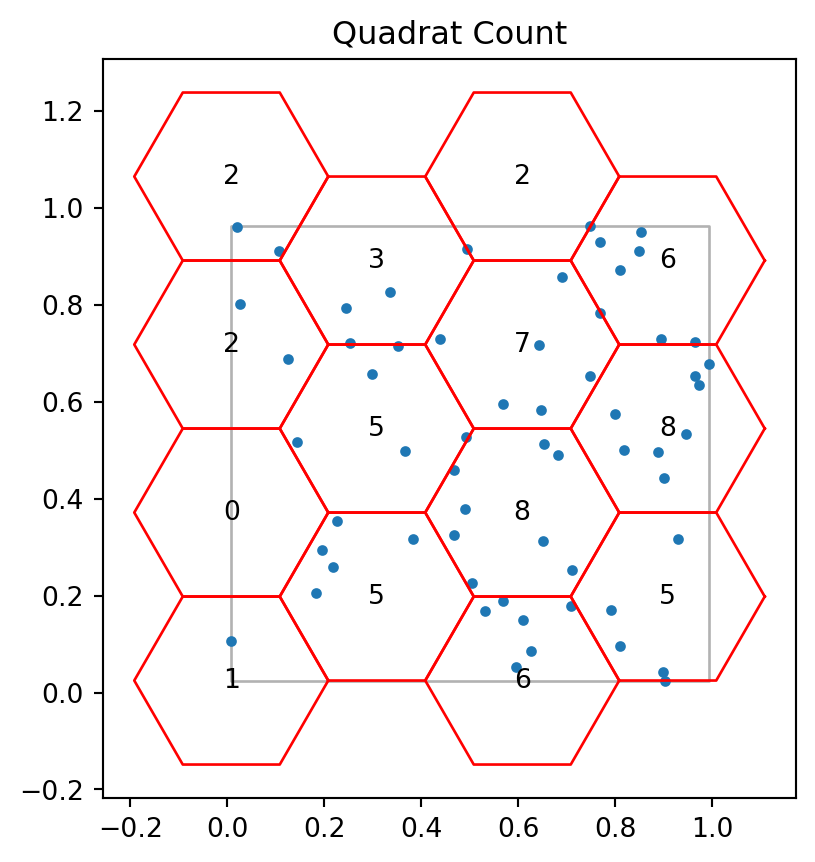

In [17]:
csr_qr_hex.plot()

In [18]:
csr_qr_hex.chi2

20.733333333333334

In [19]:
csr_qr_hex.df

13

In [20]:
csr_qr_hex.chi2_pvalue

0.07837318677184966

In [22]:
clustered_qr_hex = qs.QStatistic(clustered, shape='hexagon', lh=0.2)


<Axes: title={'center': 'Quadrat Count'}>

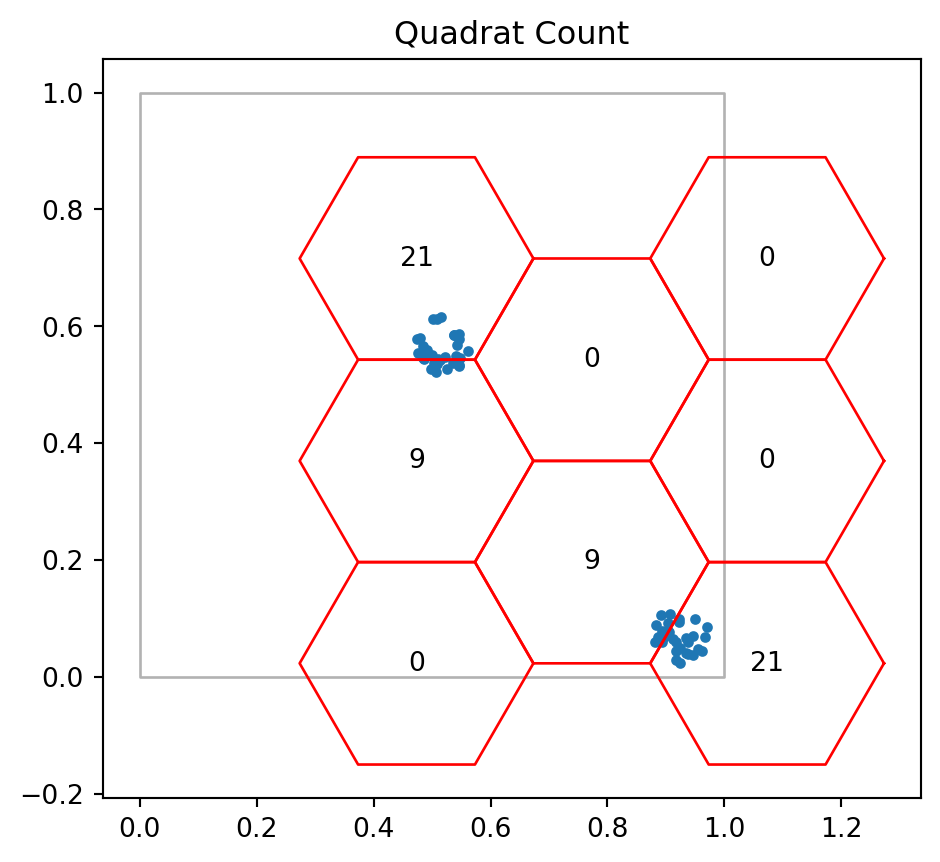

In [23]:
clustered_qr_hex.plot()

In [24]:
clustered_qr_hex.chi2_pvalue

2.0052804321944022e-14

In [25]:
from pointpats import PoissonPointProcess as poissonpp

In [26]:
clustered_sim = poissonpp(clustered.window, clustered.n, 999, asPP=True)

In [27]:
clustered_sim_hex = qs.QStatistic(clustered, shape='hexagon',
                                  lh=0.2,
                                  realizations=clustered_sim)

In [28]:
clustered_sim_hex.chi2_r_pvalue

0.001

In [29]:
clustered_sim_hex.chi2_realizations

array([26.8       , 18.86666667, 20.26666667, 19.8       , 15.6       ,
       30.53333333, 15.6       , 28.2       , 23.53333333, 17.        ,
       35.66666667, 11.4       , 19.33333333, 21.66666667, 18.4       ,
       15.6       , 17.46666667, 24.93333333, 17.        , 20.73333333,
       19.33333333, 15.6       , 38.        , 38.        , 16.06666667,
       24.46666667, 21.2       , 21.2       ,  7.66666667, 18.86666667,
       17.46666667, 24.93333333, 15.6       , 25.4       , 14.66666667,
       26.8       , 21.2       , 18.86666667, 14.66666667, 24.        ,
       11.86666667, 10.        , 17.        , 17.        ,  9.06666667,
       31.93333333, 24.93333333, 31.        , 21.2       , 17.93333333,
       11.4       , 17.        , 21.2       , 11.86666667, 21.2       ,
       19.33333333, 19.8       , 17.        , 38.        , 31.        ,
       34.73333333, 16.53333333, 33.8       , 17.93333333, 18.86666667,
       10.        ,  9.53333333, 15.6       , 25.4       , 14.66

In [30]:
import libpysal
from libpysal.cg import shapely_ext
import geopandas
import numpy as np

In [31]:
from pointpats import Window

In [32]:
va = libpysal.io.open(libpysal.examples.get_path("vautm17n.shp"))

In [33]:
polys = [shp for shp in va]
state = shapely_ext.cascaded_union(polys)

In [34]:
window = Window(state.parts)

In [35]:
np.random.seed(5)

In [36]:
samples = poissonpp(window, 200, 1, conditioning=False, asPP=False)


In [37]:
samples.realizations[0]

array([[ 414659.62831296, 4098843.62306827],
       [ 944877.32665295, 4064524.51881247],
       [ 624464.14012849, 4135522.50140932],
       [ 716322.44071544, 4158399.44765818],
       [ 831143.93926953, 4237580.13537067],
       [ 400509.95328193, 4096900.41002516],
       [ 810686.07255281, 4283013.52195582],
       [ 589382.5482221 , 4207114.63468694],
       [ 464834.86653763, 4099680.23066161],
       [ 729016.86342122, 4295967.88710233],
       [ 692558.78034025, 4104007.16031022],
       [ 707522.86530594, 4083889.38215422],
       [ 368068.7091872 , 4091422.04350303],
       [ 781939.22465452, 4097373.59625561],
       [ 690938.87384332, 4295945.27613892],
       [ 737215.08721821, 4168650.77104844],
       [ 610370.4068341 , 4121670.2849925 ],
       [ 557829.48604931, 4085935.58930553],
       [ 866763.76550655, 4111032.57384731],
       [ 834827.89687458, 4166256.04344958],
       [ 621872.14784085, 4116134.29168132],
       [ 731234.98798312, 4131270.48035054],
       [ 6

In [38]:
from pointpats import PointPattern
pp_csr = PointPattern(samples.realizations[0])

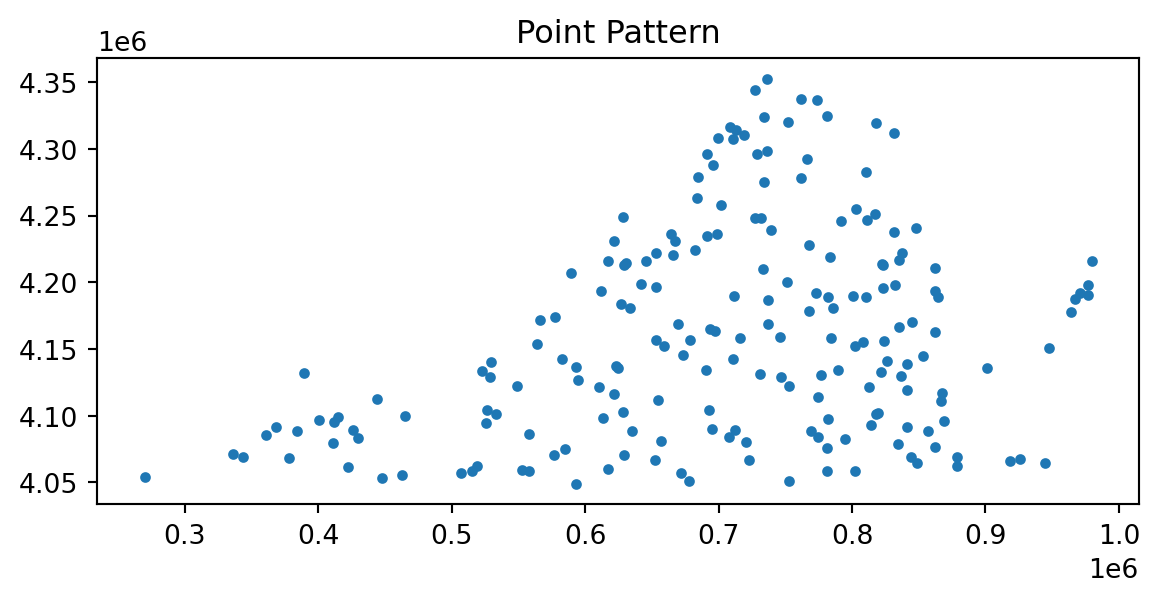

In [39]:
pp_csr.plot()

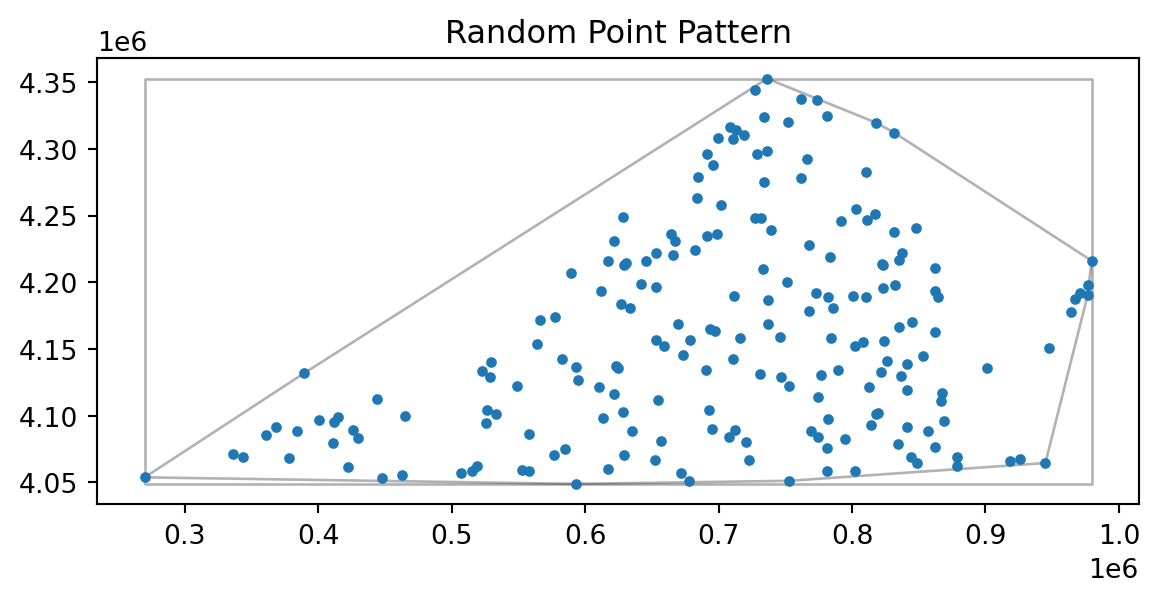

In [40]:
pp_csr.plot(window=True, hull=True, title='Random Point Pattern')

<Axes: title={'center': 'Quadrat Count'}>

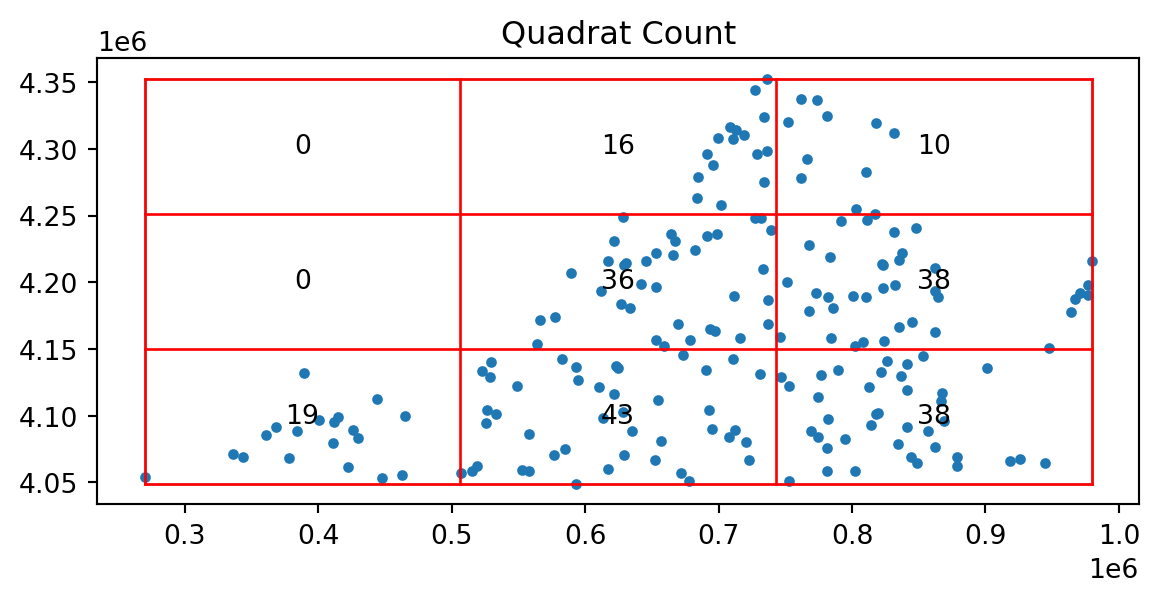

In [42]:
csr_qr = qs.QStatistic(pp_csr, shape='rectangle', nx=3, ny=3)
csr_qr.plot()

In [43]:
csr_qr.chi2_pvalue

7.295335713511762e-19

In [44]:
np.random.seed(12345)
csr_samples = poissonpp(window, 200, 99, conditioning=False, asPP=True)


In [45]:
csr_samples.realizations[0]

In [46]:
stats = []
for key in csr_samples.realizations:
    realization = csr_samples.realizations[key]
    test = qs.QStatistic(realization, shape='rectangle', nx=3, ny=3)
    stats.append(test.chi2)

In [47]:
stats = np.array(stats)
num = 1 + (stats >= csr_qr.chi2).sum()
den = 99 +1
p_value = num / den
p_value

0.31

In [48]:
import seaborn as sns

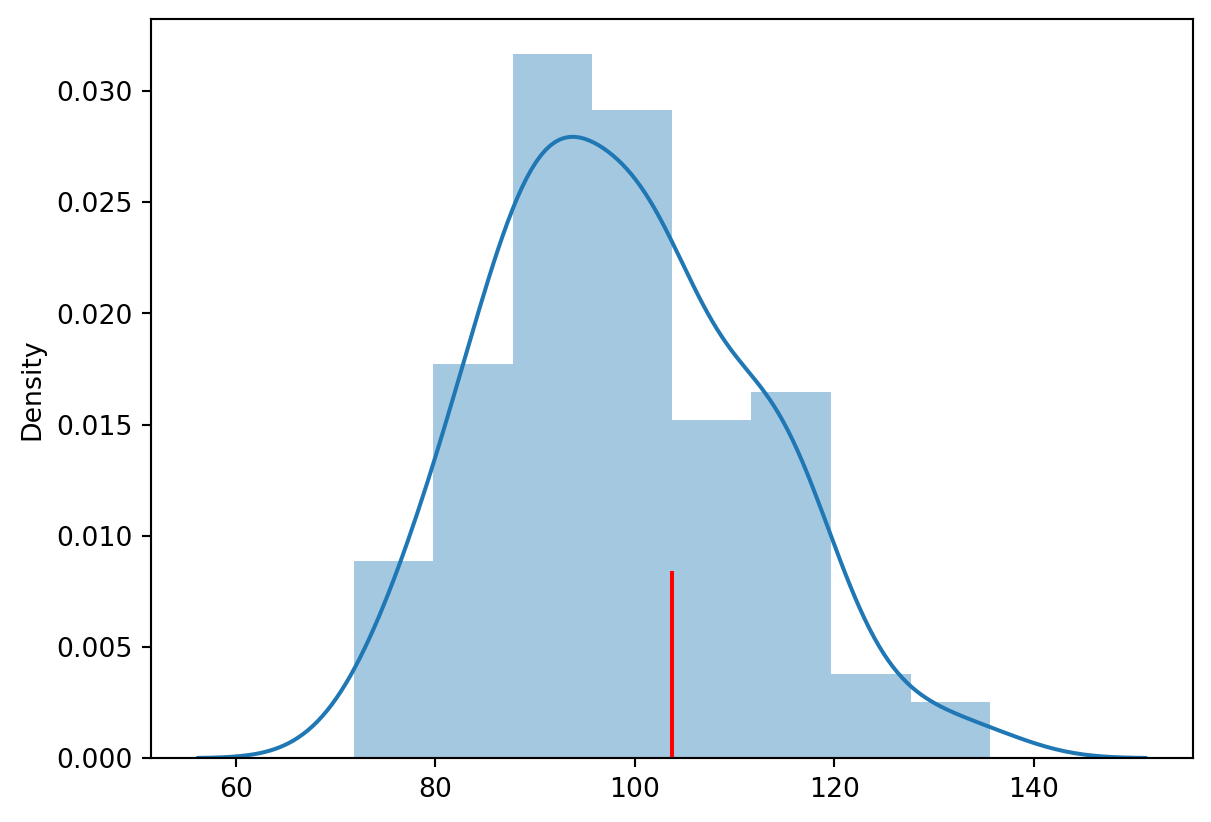

In [49]:
ax =sns.distplot(stats)
ax.axvline(x = csr_qr.chi2, ymin=0, ymax=.25, color='r')

In [50]:
csr_qr.chi2

103.75000000000001